In [56]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# import models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# import dataset packages
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split

# import from project files
from utils import plot_2d, plot_classifier_boundary

In [57]:
# create datasets

# for LDA we need Gaussian distribution (important assumption!)
# LDA works when all the independent/predictor variables are continuous (not categorical) and follow a Normal distribution.

# LogReg should not be used if the number of observations is lesser than the number of features, otherwise, it may lead to overfitting
# logreg assumes binary classification
# Hence, it is assumed that logistic regression is the more flexible and more robust method in case of violations of these assumptions



In [58]:
# add outliers
# unbalanced sample sizes --> different n

def data_lr():

    # lr_X, lr_y = make_blobs(
    #     n_samples=[700, 200], 
    #     centers=[(3,5),(6,5)],             
    #     n_features=2, 
    #     cluster_std=[5, 4],
    #     random_state=1, 
    #     shuffle=False)

    # lr_X, lr_y = make_moons(
    #     n_samples=[600, 100], 
    #     noise=0.5)

    # lr - 0.99
    # lda - 0.96
    # lr_X, lr_y = make_classification(
    #     n_samples=500,
    #     n_features=2, 
    #     n_redundant=0, 
    #     n_informative=2, 
    #     n_clusters_per_class=1,
    #     weights=[0.8, 0.2],
    #     random_state=1
    #     )


    lr_X, lr_y = make_classification(
        n_samples=100,
        n_features=2, 
        n_redundant=0, 
        n_informative=2,
        # class_sep=1.0,          # seperation of classes, default 1.0
        # flip_y=0.5,             # random class assignment, default 0.01
        weights=[0.9, 0.1],     # balance of classes
        random_state=42
        )

    return lr_X, lr_y

In [59]:
# make gaussian distribution
# no outliers
# balanced sample sizes --> similar n

def data_lda():
    
    lda_X, lda_y = make_blobs(
        n_samples=[300, 300], 
        centers=[(2,5),(8,5)],             
        n_features=2, 
        cluster_std=[1, 1],
        random_state=1, 
        shuffle=False)

    # lda_X, lda_y =  make_classification(
    #     n_samples=600,
    #     n_features=2,
    #     n_redundant=0,
    #     n_informative=2,
    #     random_state=2,
    #     n_clusters_per_class=1,
    # ),

    # lda_X, lda_y = make_moons(
    #     n_samples=[100, 100], 
    #     noise=0.1)
                    
    return lda_X, lda_y

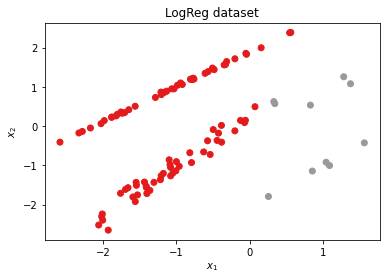

IndexError: tuple index out of range

In [60]:
# LogReg data generation and splitup
lr_X, lr_y = data_lr()
plot_2d(lr_X, lr_y, 'LogReg dataset')

lr_X_train, lr_X_test, lr_y_train, lr_y_test = train_test_split(lr_X, lr_y, test_size=.33, random_state=42)

# LDA data generation and splitup
lda_X, lda_y = data_lda()
plot_2d(lda_X, lda_y, 'LDA dataset')

lda_X_train, lda_X_test, lda_y_train, lda_y_test = train_test_split(lda_X, lda_y, test_size=.33, random_state=42)


LogReg score on LR dataset: 0.94


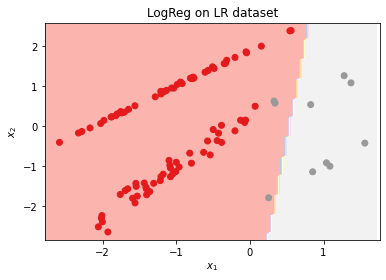

In [ ]:
# LogReg

logreg = LogisticRegression()
logreg.fit(lr_X_train, lr_y_train)

print('LogReg score on LR dataset: %.2f' % (logreg.score(lr_X_test, lr_y_test)))
plot_classifier_boundary(logreg, lr_X, lr_y, title='LogReg on LR dataset')

# plot log line
# cmap = colors.ListedColormap(['blue','orange'])
# x_show=np.arange(-1,1,0.01)
# y_show=logreg.predict(x_show[:,np.newaxis])  # ValueError: X has 1 features, but LogisticRegression is expecting 2 features as input.
# plt.scatter(lr_X, lr_y,color=cmap(lr_y))
# plt.plot(x_show,y_show,color='red')
# plt.plot(x_show,[0.5]*len(x_show),color='grey')

# expy=np.exp(logreg.intercept_+logreg.coef_[0]*x_show)
# plt.plot(x_show,expy/(1+expy),color='purple')
# plt.legend(['predict','0.5','logistic function'])

LogReg score on LDA dataset: 0.99


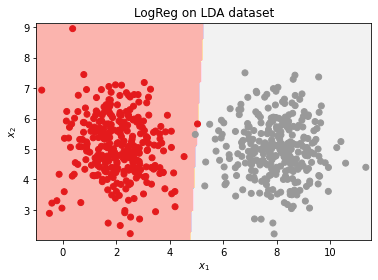

In [ ]:
# LogReg

logreg = LogisticRegression()
logreg.fit(lda_X_train, lda_y_train)

print('LogReg score on LDA dataset: %.2f' % (logreg.score(lda_X_test, lda_y_test)))
plot_classifier_boundary(logreg, lda_X, lda_y, title='LogReg on LDA dataset')

LDA score on LDA dataset: 0.99


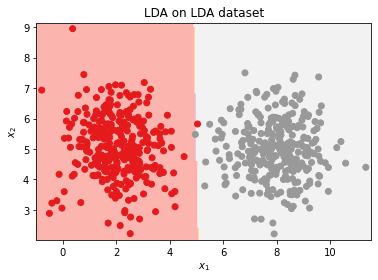

In [ ]:
# LDA

lda = LDA()
lda.fit(lda_X_train, lda_y_train)

print('LDA score on LDA dataset: %.2f' % (lda.score(lda_X_test, lda_y_test)))
plot_classifier_boundary(lda, lda_X, lda_y, title='LDA on LDA dataset')

LDA score on LR dataset: 0.97


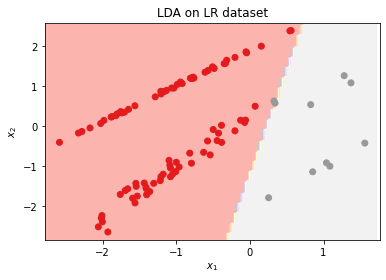

In [ ]:
# LDA

lda = LDA()
lda.fit(lr_X_train, lr_y_train)

print('LDA score on LR dataset: %.2f' % (lda.score(lr_X_test, lr_y_test)))
plot_classifier_boundary(lda, lr_X, lr_y, title='LDA on LR dataset')


In [ ]:
repeats = 10
logreg_scores = []
for k in range(repeats):
    model = LogisticRegression()
    model.fit(lr_X_train, lr_y_train)
    logreg_scores.append(model.score(lr_X_test, lr_y_test))

logreg_scores = np.array(logreg_scores)
print('Logitic Regression scores:', logreg_scores)
# LogReg models always get same score for same dataset


Logitic Regression scores: [0.93939394 0.93939394 0.93939394 0.93939394 0.93939394 0.93939394
 0.93939394 0.93939394 0.93939394 0.93939394]
